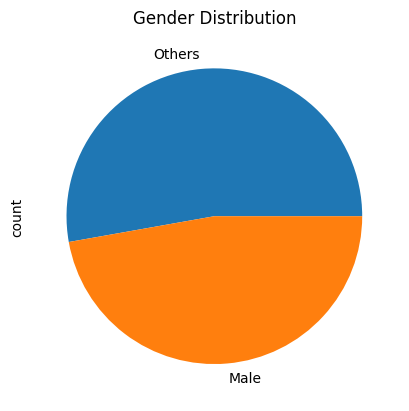

PearsonRResult(statistic=-0.12110190858878053, pvalue=1.081079e-317)
-234.60710860037688 0.0
                            OLS Regression Results                            
Dep. Variable:        mean_well_being   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1463.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          1.08e-317
Time:                        18:59:01   Log-Likelihood:            -1.0096e+05
No. Observations:               98278   AIC:                         2.019e+05
Df Residuals:                   98276   BIC:                         2.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------

C:\Users\ACER\AppData\Local\Temp\ipykernel_17960\2208337220.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['mean_well_being'] = mean_well_being
C:\Users\ACER\AppData\Local\Temp\ipykernel_17960\2208337220.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['mean_digital_daily_screen_time'] = mean_digital_daily_screen_time


In [15]:
#importing necessary dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats

#Reading the csv files
dataset3 = pd.read_csv("C:/Users/Dell/Desktop/Assignment/dataset3.csv")
dataset2 = pd.read_csv("C:/Users/Dell/Desktop/Assignment/dataset2.csv")
dataset1 = pd.read_csv("C:/Users/Dell/Desktop/Assignment/dataset1.csv")



dataset = dataset1.merge(dataset2, on = "ID", how = "left")
dataset = dataset.merge(dataset3, on="ID", how = 'left')

cleaned_dataset = dataset.dropna()
cleaned_dataset.isna().sum()

cleaned_dataset.head()


cleaned_dataset['gender'].value_counts().plot(kind='pie', labels = ["Others","Male"])
plt.title('Gender Distribution')
plt.show()

mean_wellbeing = cleaned_dataset.loc[:,('Optm','Usef','Relx','Intp','Engs','Dealpr','Thcklr','Goodme','Clsep','Conf','Mkmind','Loved','Intthg','Cheer')].mean()

cleaned_dataset.head()

mean_digital_daily_screen_time= cleaned_dataset[['C_we','C_wk','G_we','G_wk','S_we','S_wk','T_we','T_wk']].mean(axis = 1)

mean_well_being = cleaned_dataset[['Optm','Usef','Relx','Intp','Engs','Dealpr','Thcklr','Goodme','Clsep','Conf','Mkmind','Loved','Intthg','Cheer']].mean(axis = 1)

cleaned_dataset['mean_well_being'] = mean_well_being
cleaned_dataset['mean_digital_daily_screen_time'] = mean_digital_daily_screen_time

model = LinearRegression()

y= cleaned_dataset.iloc[:,-2]
x= cleaned_dataset.iloc[:,-1]

pearson = scipy.stats.pearsonr(x, y)
print(pearson)

t_stat, p_value = scipy.stats.ttest_ind(cleaned_dataset['mean_digital_daily_screen_time'], cleaned_dataset['mean_well_being'])

print(t_stat,p_value)

x = sm.add_constant(x)

result = sm.OLS(y,x).fit()


print(result.summary())



